# Segmentation

**Author:** Rudra Nath Palit

## Otsu Thresholding

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.cluster import  estimate_bandwidth

### Histogram of Image 

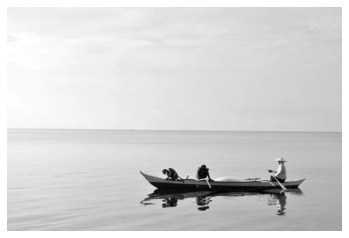

In [97]:
img = cv2.imread('./img/img2.webp', 0)

plt.figure(figsize = (6,6))
plt.imshow(img, cmap='gray', vmax= 255, vmin=0)
plt.axis('off')
plt.show()

Calculate the histogram as a pdf

In [98]:
img_flat = img.flatten()
hist, _ = np.histogram(img_flat, range(0,257), density=True)
x = np.arange(0, 256)

Plot the histogram

<BarContainer object of 256 artists>

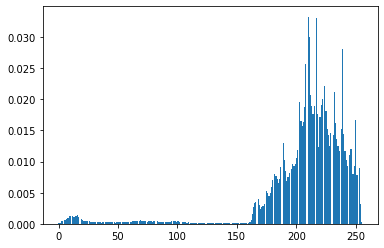

In [99]:
plt.bar(x, hist, width = 1)

### Finding optimum threshold

Function to calculate the optimum otsu threshold

In [100]:
def otsu_thresholding(hist):

    P0 = 0
    u0P0 = 0
    u1P1 = 0
    ut = 0
    max_sigma = 0
    optimum_threshold = 0

    for i in range(256):
        ut += i*hist[i]

    for t in range(256):
        P0 += hist[t]
        P1 = 1 - P0
        u0P0 += t*hist[t]
        u1P1 = ut - u0P0

        u0 = u0P0 / P0
        u1 = u1P1 / P1

        sigma_b = P0*P1*(u0 - u1)**2
        if sigma_b > max_sigma:
            max_sigma = sigma_b
            optimum_threshold = t
    return optimum_threshold

Threshold image based on optimum threshold

In [101]:
threshold = otsu_thresholding(hist)
img_threshold = np.zeros(img.shape)
img_threshold[img >= threshold] = 255
img_threshold[img < threshold] = 0

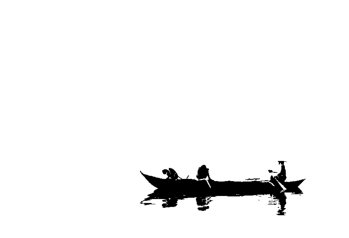

In [102]:
plt.figure(figsize = (6,6))
plt.imshow(img_threshold, cmap='gray', vmax= 255, vmin=0)
plt.axis('off')
plt.show()

## K Means Clustering

(-0.5, 399.5, 298.5, -0.5)

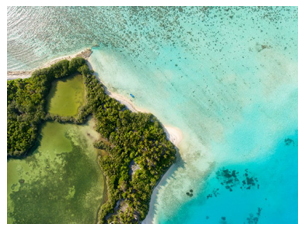

In [136]:
img = cv2.imread('./img/img3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

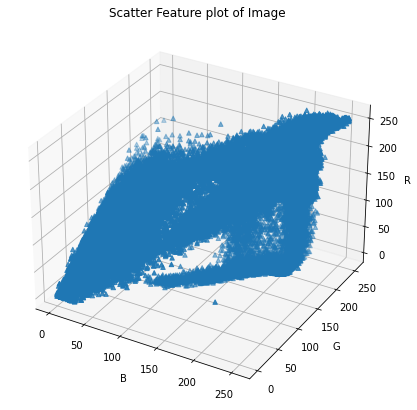

In [137]:
from mpl_toolkits import mplot3d
img_vectors= img.reshape((-1,3))
x = img_vectors[:, 0]
y = img_vectors[:, 1]
z = img_vectors[:, 2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, marker ='^')
plt.title("Scatter Feature plot of Image")
ax.set_xlabel('B')
ax.set_ylabel('G')
ax.set_zlabel('R')
plt.show()

Computing centroids using K-Means++ algorithm 

In [138]:
import sys
def getCentroids(vectors, knum):
    centroid = []
    centroid.append(vectors[np.random.randint(vectors.shape[0]), :])

    for _ in range(knum - 1):
        dist = np.zeros((vectors.shape[0], 1))
        
        for i in range(vectors.shape[0]):
            d = sys.maxsize
            for point in centroid:
                d = min(d, np.linalg.norm(point.astype('float') - vectors[i].astype('float'), ord=2))
            dist[i] = d

        
        centroid.append(vectors[np.argmax(dist), :])
        # print(dist)
    return np.array(centroid)
centroids = getCentroids(img_vectors, knum=3)

Scatter plots of the initial centroids

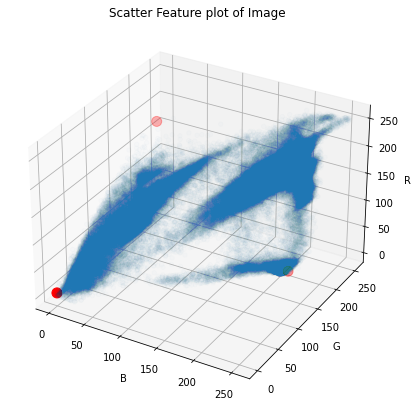

In [139]:
from mpl_toolkits import mplot3d

x = img_vectors[:,0]
y = img_vectors[:,1]
z = img_vectors[:,2]

xc = centroids[:,0]
yc = centroids[:,1]
zc = centroids[:,2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, alpha = 0.01)
ax.scatter3D(xc, yc, zc, color = 'red', s=100)

plt.title("Scatter Feature plot of Image")
ax.set_xlabel('B')
ax.set_ylabel('G')
ax.set_zlabel('R')
plt.show()

K Means Algorithm

In [140]:
def kmeans(vectors, centroids, epsilon, max_iter):
    vectors = vectors.astype('float')
    centroids = centroids.astype('float')
    centroids_new = np.zeros(centroids.shape)
    labels = np.zeros((vectors.shape[0], ), dtype=np.uint8)
    iter = 0
    while (iter < max_iter):
        # Distance of all points from centroid
        dist = np.zeros((centroids.shape[0], 1))
        for i in range(vectors.shape[0]):
            for k in range(centroids.shape[0]):
                dist[k] = np.linalg.norm(centroids[k] - vectors[i], ord = 2)
            labels[i] = np.argmin(dist)

        # Calculate new centroids
        for k in range(centroids.shape[0]):
            centroids_new[k] = np.mean(vectors[labels == k,:])

        # Check convergence
        if np.linalg.norm(centroids_new - centroids, ord = 2) < epsilon:
            break
        centroids[:] = centroids_new[:]
        iter += 1 
    else:
        print('Max Iteration surpassed.')

    return labels
        
labels = kmeans(img_vectors, centroids, 5, 10000)

    

Scatter plot of the clusters

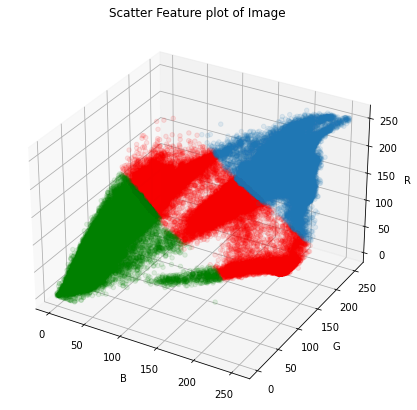

In [141]:
from mpl_toolkits import mplot3d

# cluster 0
c0 = img_vectors[labels == 0, :]
x0 = c0[:, 0]
y0 = c0[:, 1]
z0 = c0[:, 2]

# cluster 1
c1 = img_vectors[labels == 1, :]
x1 = c1[:, 0]
y1 = c1[:, 1]
z1 = c1[:, 2]

# cluster 2
c2 = img_vectors[labels == 2, :]
x2 = c2[:, 0]
y2 = c2[:, 1]
z2 = c2[:, 2]


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x0, y0, z0, alpha = 0.1)
ax.scatter3D(x1, y1, z1, color = 'green', alpha = 0.1)
ax.scatter3D(x2, y2, z2, color = 'red', alpha = 0.1)

plt.title("Scatter Feature plot of Image")
ax.set_xlabel('B')
ax.set_ylabel('G')
ax.set_zlabel('R')
plt.show()

Text(0.5, 1.0, 'Segmented Image')

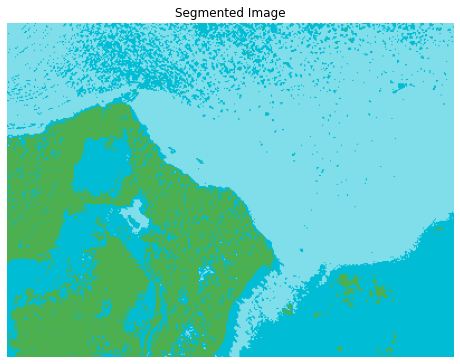

In [142]:
labels_image = labels.reshape((img.shape[0], img.shape[1]))
segmented_image = np.zeros(img.shape, dtype = np.uint8)
segmented_image[labels_image==0] = [128, 222, 234]
segmented_image[labels_image==1] = [76, 175, 80]
segmented_image[labels_image==2] = [0, 188, 212]
plt.figure(figsize = (8,8))
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmented Image')

## Mean Shift Algorithm

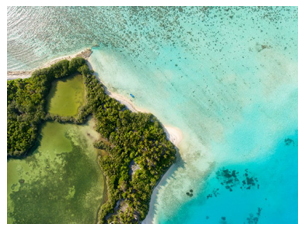

In [4]:
img = cv2.imread('./img/img3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

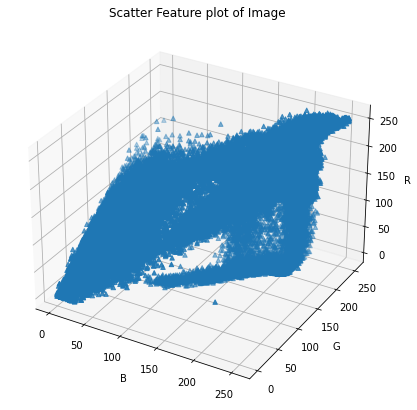

In [5]:
from mpl_toolkits import mplot3d
img_vectors= img.reshape((-1,3))
x = img_vectors[:, 0]
y = img_vectors[:, 1]
z = img_vectors[:, 2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, marker ='^')
plt.title("Scatter Feature plot of Image")
ax.set_xlabel('B')
ax.set_ylabel('G')
ax.set_zlabel('R')
plt.show()

We can estimate the bandwidth required for Mean Shift algorithm from the data itself.

In [7]:
bandwidth = estimate_bandwidth(img_vectors, quantile=0.2, n_samples=500)
bandwidth


62.68193513102004

Now we can define the mean shift cluster model and fit it into our data.

In [8]:
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(img_vectors)
cluster_centers = msc.cluster_centers_
labels = msc.labels_
cluster_label = np.unique(labels)
n_clusters = len(cluster_label)
n_clusters

3

Here we can see it has been predicted as we have estimated there should be 3 clusters. Now, let us try to visualize the clusters:

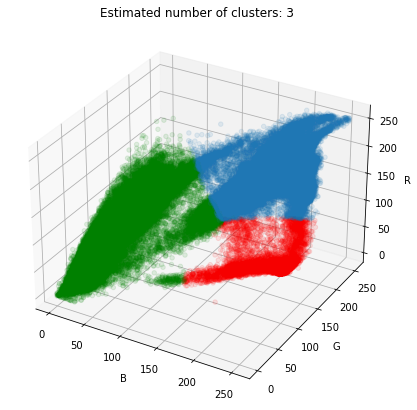

In [13]:
# cluster 0
c0 = img_vectors[labels == 0, :]
x0 = c0[:, 0]
y0 = c0[:, 1]
z0 = c0[:, 2]

# cluster 1
c1 = img_vectors[labels == 1, :]
x1 = c1[:, 0]
y1 = c1[:, 1]
z1 = c1[:, 2]

# cluster 2
c2 = img_vectors[labels == 2, :]
x2 = c2[:, 0]
y2 = c2[:, 1]
z2 = c2[:, 2]


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x0, y0, z0, alpha = 0.1)
ax.scatter3D(x1, y1, z1, color = 'green', alpha = 0.1)
ax.scatter3D(x2, y2, z2, color = 'red', alpha = 0.1)

ax.set_xlabel('B')
ax.set_ylabel('G')
ax.set_zlabel('R')
plt.title('Estimated number of clusters: %d' % n_clusters)  
plt.show()

We can build the segmented image from the labels itself.

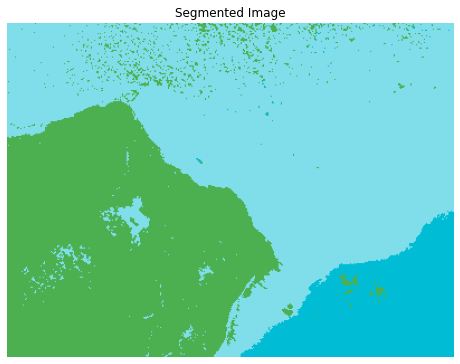

In [15]:
labels_image = labels.reshape((img.shape[0], img.shape[1]))
segmented_image = np.zeros(img.shape, dtype = np.uint8)
segmented_image[labels_image==0] = [128, 222, 234]
segmented_image[labels_image==1] = [76, 175, 80]
segmented_image[labels_image==2] = [0, 188, 212]
plt.figure(figsize = (8,8))
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmented Image')
plt.show()

As, it can be seen the Mean Shift Algorithm does a better job at forming clusters compared to the K-Means clustering algorithm.